# Workshop 4: Modelling Space

We've already seen that we can use arrays to store one-dimensional sequences of numerical data. Such data might represent a time series of measurements, such as daily recordings of atmospheric pressure.

[picture]

On the other hand, we might need to work with data that is 2-dimensional, such as recordings of atmospheric pressure over in a rectangular region.

[picture]

In this workshop you will 

## Moving Averages and Smoothing    

A **moving average** is commonly used when visualising time series data in order to smooth out short-term fluctuations in the data. {numref}`moving_average_fig` shows 113 days of atmospheric pressure are displayed along with the 10-day and 5-day moving averages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def moving_average(x, k):
    n = len(x)
    y = np.zeros(n)

    for i in range(0, n):
        y[i] = np.average(x[max(i-k, 0):min(i+k+1, n)])
    
    return y

pressure_data = [1018.3, 1018.3, 1015.7, 1014.3, 1011.8, 1011.4, 1015.5, 1016.0, 1016.9, 1016.8, 1016.4, 1017.5, 1018.8, 1018.1, 1017.1, 1018.4, 1022.0, 1022.8, 1021.8, 1020.5, 1021.0, 1019.8, 1018.9, 1018.4, 1017.8, 1018.1, 1019.6, 1017.4, 1015.8, 1015.5, 1017.5, 1018.9, 1017.7, 1014.4, 1014.2, 1016.0, 1016.1, 1015.6, 1016.4, 1015.7, 1016.6, 1019.6, 1021.6, 1021.4, 1020.6, 1017.6, 1016.5, 1016.2, 1013.0, 1005.4, 1007.4, 1012.2, 1015.2, 1016.1, 1014.3, 1012.4, 1014.2, 1013.1, 1012.9, 1012.1, 1010.6, 1010.0, 1010.5, 1010.3, 1007.4, 1008.9, 1007.4, 1006.9, 1009.8, 1014.8, 1014.9, 1016.6, 1014.1, 1011.1, 1010.7, 1009.8, 1011.9, 1012.6, 1011.8, 1009.8, 1008.9, 1010.6, 1009.9, 1010.2, 1009.5, 1009.0, 1007.1, 1007.1, 1007.5, 1005.0, 1004.2, 1004.2, 1007.2, 1005.0, 1002.9, 1007.4, 1010.4, 1010.6, 1008.6, 1006.2, 1005.9, 1006.8, 1004.6, 1002.4, 1003.2, 1004.4, 1003.1, 1000.9, 998.6, 999.9, 1001.6, 1002.1, 1004.1]

fig = plt.figure(figsize=(8, 4))
plt.plot(moving_average(pressure_data, 10), label="10 day")
plt.plot(moving_average(pressure_data, 5), label="5 day")
plt.plot(pressure_data, label="raw data", color="black")
plt.grid()
plt.xlabel("Day")
plt.ylabel("Pressure (mbar)")
plt.legend()

glue("moving_average", fig, display=False)

: 

```{glue:figure} moving_average
:figwidth: 600px
:name: "moving_average_fig"

Atmospheric pressure measured for 113 consecutive days, along with 10-day and 5-day moving averages, where the $k$-day moving averages are taken over $2k+1$ measurements centred at each day.
```



In this workshop, we define the **k-moving average** of an array is the array formed by averaging $k$ values on either side of each element (a total of $2k + 1$ elements). For example, given a sequence of values $x_i$ then the 1-moving average $y_i$ is defined by:

$$y_i = (x_{i-1} + x_i + x_{i+1})/3.$$

We can calculate the 1-moving average in Python as follows.

In [66]:
import numpy as np

x = np.array([1.0, 5.0, 3.4, 2.1, 6.5, 2.4, 3.1])
n = len(x)

y = np.zeros(n)

for i in range(1, n - 1):
    y[i] = (x[i-1] + x[i] + x[i+1]) / 3

print("1-moving average:", y)

1-moving average: [0.         3.13333333 3.5        4.         3.66666667 4.
 0.        ]


A more compact way to calculate the sum of consecutive elements is using `numpy` slice notation. We can replace `(x[i-1] + x[i] + x[i+1])/3` with `np.average(x[i-1:i+2])`. `x[a, b]` represents the subarray from `a` to `b` (*including* the lower limit but *excluding* the upper limt).

In [34]:
y = np.zeros(n)
for i in range(1, n - 1):
    y[i] = np.average(x[i-1:i+2]) 

print("1-moving average:", y)

3 moving average: [0.         3.13333333 3.5        4.         3.66666667 4.
 0.        ]


Notice that when `i=0` or `i=n` the subarray `x[i-1,i+2]` would include elements outside the bounds of the array `x`. The `for` loop therefore excludes the first and last element in its `range` function and we end up with zeros padding the start and end of the array.

:::{exercise}
Calculate the 5-moving average of `x`. You should get the following result:

```
[0.   0.   3.6  3.88 3.5  0.   0.  ]
```
:::



:::{exercise}
Write a function `moving_average(x, k)` which returns an array containing the `k`-moving average of `x`.

```
def moving_average(x, k):
    n = len(x)
    y = np.zeros(n)

    # your code
    
    return y
```

Check that `moving_average(x, 1)` and `moving_average(x, 2)` produce the correct 1- and 2-moving averages as previously calculated.
:::

In [37]:
def moving_average(x, k):
    n = len(x)
    y = np.zeros(n)

    for i in range(k, n - k):
        y[i] = np.average(x[i-k:i+k+1])
    
    return y

print(moving_average(x, 2))

[0.   0.   3.6  3.88 3.5  0.   0.  ]


Instead of padding the start and end of the array with zeros, we can simply average only the elements of the subarray `x[i-1,i+2]` which lie within the bounds of `x`. In the case of the 1-moving average we can achieve this by replacing the lower limit with `max(i-1, 0)` and the upper limit with `min(i+2, n)`. We also change the `for` loop to include the full range from `0` to `n`.

In [38]:
y = np.zeros(n)
for i in range(0, n):
    y[i] = np.average(x[max(i-1,0):min(i+2, n)]) 

print("1-moving average:", y)

3 moving average: [3.         3.13333333 3.5        4.         3.66666667 4.
 2.75      ]


:::{exercise}
Change your function `moving_average(x, k)` to remove the zero-padding.
:::

The array `pressure_data` contains the atmospheric pressure (measured in millibars) shown in {numref}`moving_average`.

In [39]:
pressure_data = [1018.3, 1018.3, 1015.7, 1014.3, 1011.8, 1011.4, 1015.5, 1016.0, 1016.9, 1016.8, 1016.4, 1017.5, 1018.8, 1018.1, 1017.1, 1018.4, 1022.0, 1022.8, 1021.8, 1020.5, 1021.0, 1019.8, 1018.9, 1018.4, 1017.8, 1018.1, 1019.6, 1017.4, 1015.8, 1015.5, 1017.5, 1018.9, 1017.7, 1014.4, 1014.2, 1016.0, 1016.1, 1015.6, 1016.4, 1015.7, 1016.6, 1019.6, 1021.6, 1021.4, 1020.6, 1017.6, 1016.5, 1016.2, 1013.0, 1005.4, 1007.4, 1012.2, 1015.2, 1016.1, 1014.3, 1012.4, 1014.2, 1013.1, 1012.9, 1012.1, 1010.6, 1010.0, 1010.5, 1010.3, 1007.4, 1008.9, 1007.4, 1006.9, 1009.8, 1014.8, 1014.9, 1016.6, 1014.1, 1011.1, 1010.7, 1009.8, 1011.9, 1012.6, 1011.8, 1009.8, 1008.9, 1010.6, 1009.9, 1010.2, 1009.5, 1009.0, 1007.1, 1007.1, 1007.5, 1005.0, 1004.2, 1004.2, 1007.2, 1005.0, 1002.9, 1007.4, 1010.4, 1010.6, 1008.6, 1006.2, 1005.9, 1006.8, 1004.6, 1002.4, 1003.2, 1004.4, 1003.1, 1000.9, 998.6, 999.9, 1001.6, 1002.1, 1004.1]

113

:::{exercise}
Plot the atmospheric pressure data on a line graph. On the same graph, plot the 5- and 10-moving averages (as shown in {numref}`moving_average`).
:::

### 2D Moving Averages

We can extend the definition of moving average to 2-dimensional data. For example, the 2-dimensional 1-moving average is calculated by taking the average of the 9 values in the 3 by 3 sub-array centred at each element.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0, 0, 0, 0],
              [0, 6, 6, 6, 0],
              [0, 6, 6, 6, 0],
              [0, 6, 6, 6, 0],
              [0, 0, 0, 0, 0]])

sub_array = x[0:3, 0:3]
average = np.average(sub_array)

print("3 by 3 sub array:\n", sub_array)
print("average:", average)

3 by 3 sub array:
 [[0 0 0]
 [0 6 6]
 [0 6 6]]
average: 2.6666666666666665


In [ ]:
n, m = np.shape(x)
x_smoothed = np.zeros((n, m))


for i in range(1, n-1):
    for j in range(1, m-1):
        x_smoothed[i, j] = np.average(x[i-1:i+2,j-1:j+2])

plt.imshow(x_smoothed)



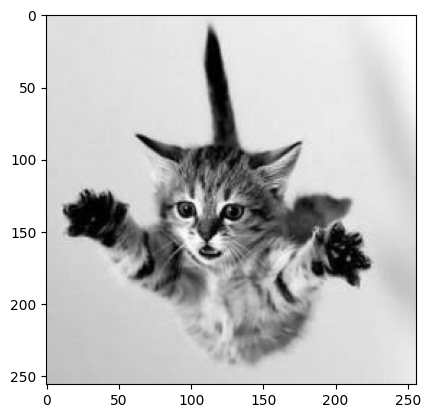

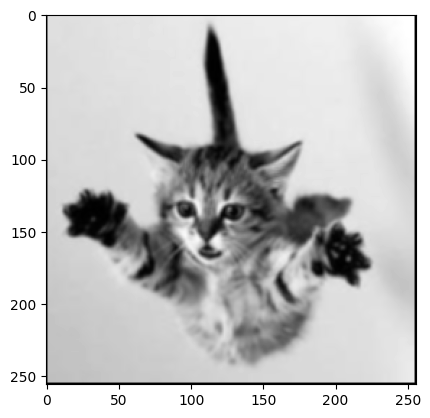

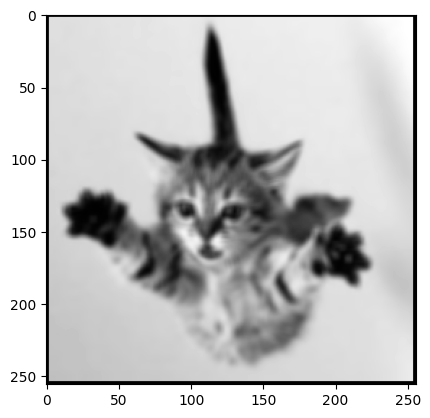

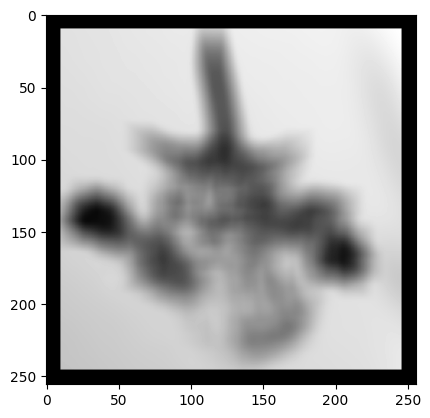

In [29]:
import matplotlib.image as mpimg

img = mpimg.imread("25wlcatsfalling.jpg.article-962.jpg")

img2 = np.average(img, axis=2)

img2.shape

plt.imshow(img2, cmap="gray")


n, m = np.shape(img2)

x_smoothed = np.zeros((n, m))
for i in range(1, n-1):
    for j in range(1, m-1):
        x_smoothed[i, j] = np.average(img2[i-1:i+2,j-1:j+2])

plt.figure()
plt.imshow(x_smoothed, cmap="gray")

x_smoothed = np.zeros((n, m))
for i in range(2, n-2):
    for j in range(2, m-2):
        x_smoothed[i, j] = np.average(img2[i-2:i+3,j-2:j+3])

plt.figure()
plt.imshow(x_smoothed, cmap="gray")

x_smoothed = np.zeros((n, m))
for i in range(k, n-k):
    for j in range(k, m-k):
        x_smoothed[i, j] = np.average(img2[i-k:i+k+1,j-k:j+k+1])

plt.figure()
plt.imshow(x_smoothed, cmap="gray")


## Diffusion

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.02195325, 0.06373414, 0.12916988, 0.19385714,
        0.22489478, 0.20071701, 0.13824833, 0.06597471, 0.        ],
       [0.        , 0.06719003, 0.23405037, 0.51463109, 0.82582549,
        0.95791717, 0.83973897, 0.53321504, 0.23572349, 0.        ],
       [0.        , 0.13996264, 0.52519641, 1.39125491, 2.3321092 ,
        2.82642873, 2.31311997, 1.37805946, 0.50120564, 0.        ],
       [0.        , 0.21509273, 0.83510933, 2.31309967, 4.64190951,
        5.39754476, 4.47239068, 2.14630887, 0.77441148, 0.        ],
       [0.        , 0.25420548, 0.96053597, 2.67278823, 5.22825359,
        7.27248125, 4.78400294, 2.47213861, 0.8671675 , 0.        ],
       [0.        , 0.23290416, 0.83038874, 2.13008668, 4.00491214,
        4.63007076, 3.84802318, 1.96863126, 0.74962385, 0.        ],
       [0.        , 0.165823  , 0.5357809

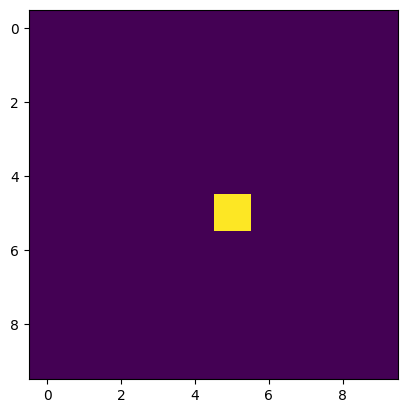

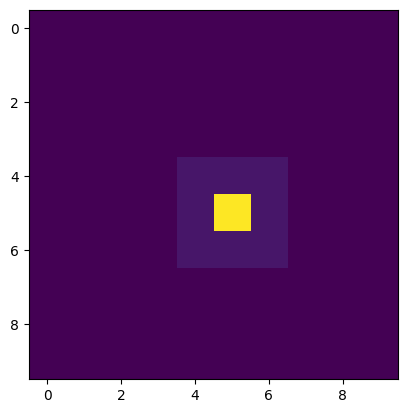

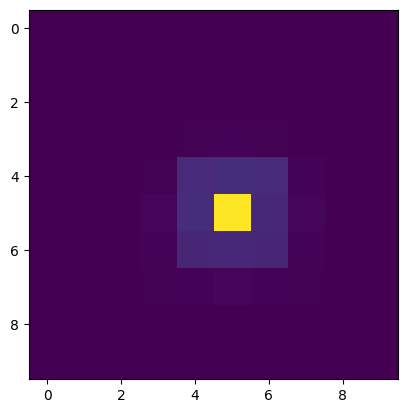

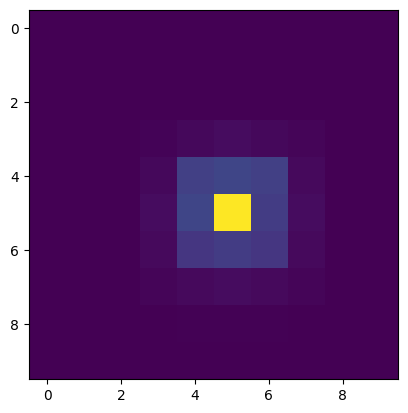

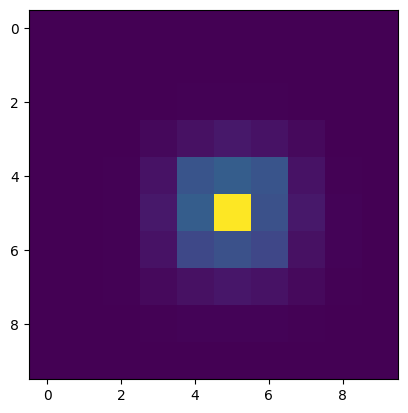

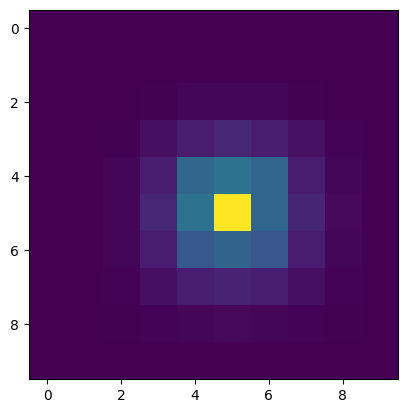

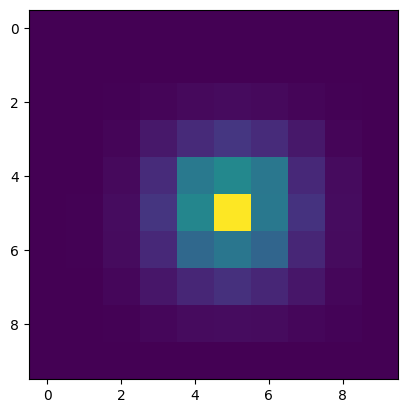

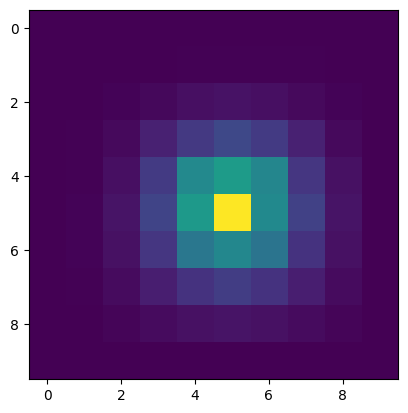

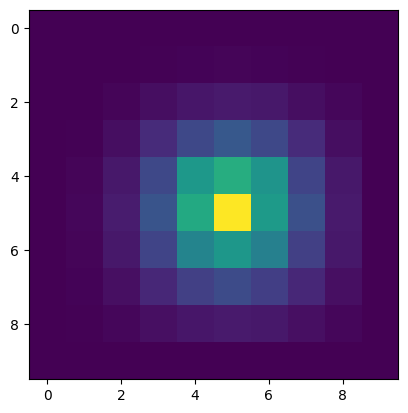

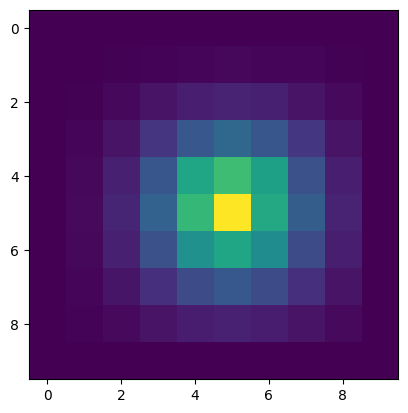

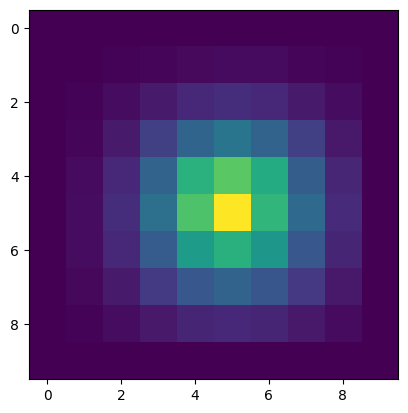

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
x = np.zeros((n,n))

x[5,5] = 100

plt.figure()
plt.imshow(x)

z = np.zeros((n,n))

filter = np.array([[.04, .04, .04],
                   [.04, .68, .04],
                   [.04, .04, .04]])

for q in range(10):

    for i in range(1, n - 1):
        for j in range(1, n - 1):
            z[i, j] = np.sum(x[i-1:i+2,j-1:j+2] * filter)

    plt.figure()
    plt.imshow(z)

    x = z

z